In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
(training_data, training_label), (testing_data, testing_label) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
label = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
print(f"Shape of training data  is : {training_data.shape}")
print(f"Shape of training label is : {training_label.shape}")
print(f"Shape of testing data   is : {testing_data.shape}")
print(f"Shape of testing label  is : {testing_label.shape}")

Shape of training data  is : (60000, 28, 28)
Shape of training label is : (60000,)
Shape of testing data   is : (10000, 28, 28)
Shape of testing label  is : (10000,)


Text(0.5, 1.0, 'Ankle boot')

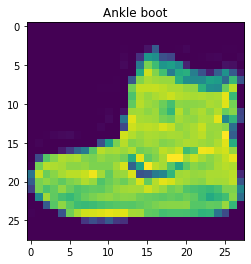

In [6]:
plt.imshow(training_data[0])
plt.title(label[training_label[0]])

In [7]:
training_data = training_data / 255.0
testing_data  = testing_data  / 255.0

In [11]:
class CallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs = {}):
        if logs['accuracy'] > 0.95:
            print(f"Model accuracy is more than {(logs['accuracy'] * 100)} %%")
            self.model.stop_training = True

cb = CallBack()
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), input_shape = (28,28,1), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10,  activation = tf.keras.activations.softmax)
])

model4.compile(optimizer = tf.keras.optimizers.Adam() , loss = tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
model4.fit(training_data, training_label, epochs = 100, callbacks=[cb])

Epoch 1/100
1875/1875 [==============================] - 215s 114ms/step - loss: 0.4054 - accuracy: 0.8510
Epoch 2/100
1875/1875 [==============================] - 201s 107ms/step - loss: 0.2690 - accuracy: 0.8995
Epoch 3/100
1875/1875 [==============================] - 203s 108ms/step - loss: 0.2220 - accuracy: 0.9169
Epoch 4/100
1875/1875 [==============================] - 202s 108ms/step - loss: 0.1860 - accuracy: 0.9294
Epoch 5/100
1875/1875 [==============================] - 200s 107ms/step - loss: 0.1581 - accuracy: 0.9404
Epoch 6/100
1875/1875 [==============================] - 201s 107ms/step - loss: 0.1289 - accuracy: 0.9499
Epoch 7/100
1875/1875 [==============================] - 203s 108ms/step - loss: 0.1064 - accuracy: 0.9602


In [12]:
model4.history.history.keys()

dict_keys(['loss', 'accuracy'])

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

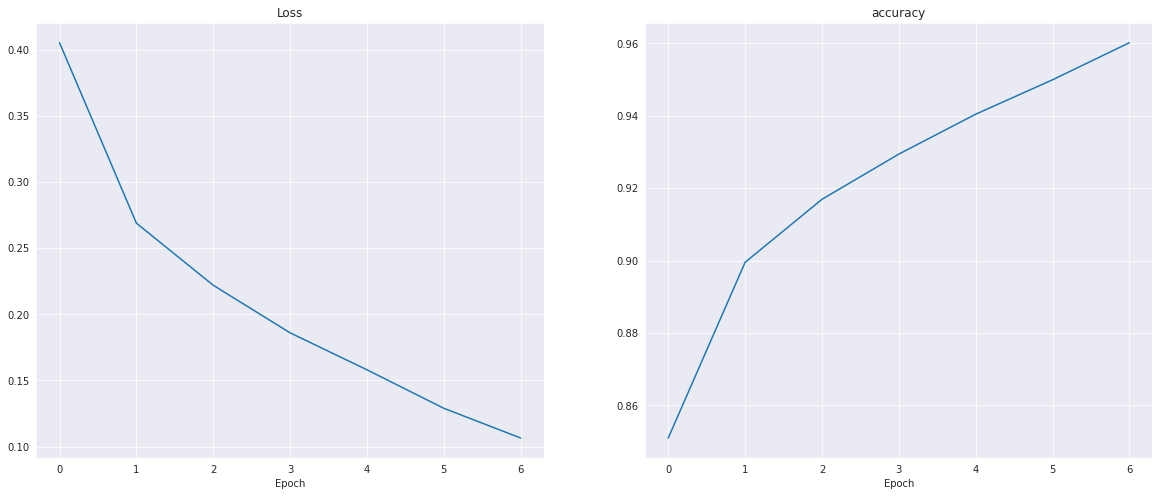

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

ax[0].plot(np.arange(len(model4.history.history['loss'])), model4.history.history['loss'])
ax[0].set_title('Loss')
ax[0].set_xlabel("Epoch")

ax[1].plot(np.arange(len(model4.history.history['accuracy'])), model4.history.history['accuracy'])
ax[1].set_title('accuracy')
ax[1].set_xlabel("Epoch")

fig.show()

1/1 [==============================] - 0s 24ms/step


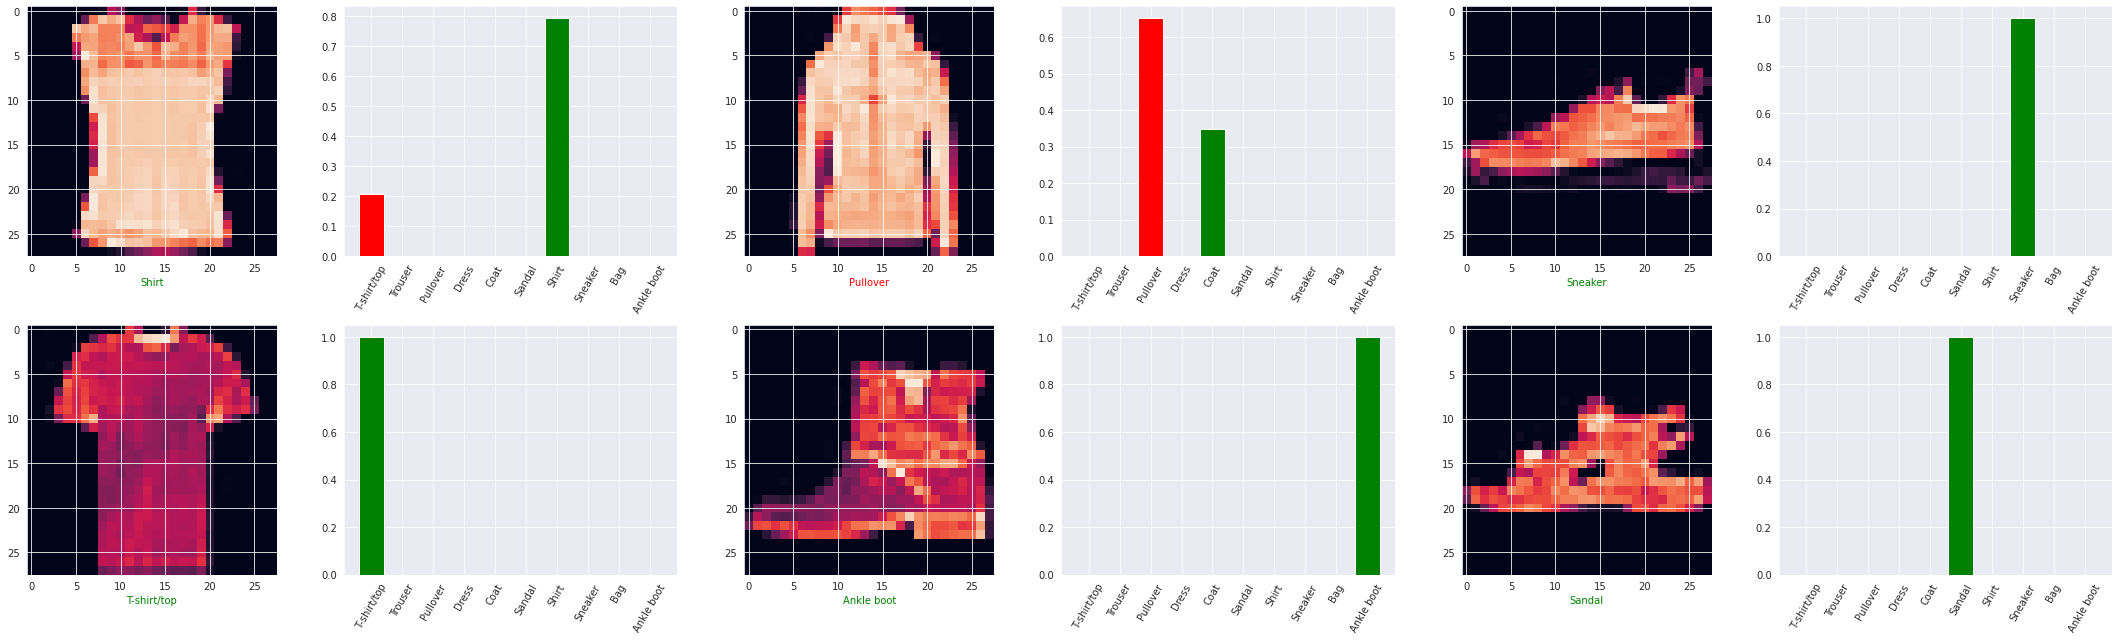

In [17]:
fig, ax = plt.subplots(2,6, figsize=(30,9))


for i in range(2):
    for j in range(0,6,2):
        random_val = np.random.randint(0,10000)
        test_img  = testing_data[random_val].reshape(1,28,28,1)
        act_label = testing_label[random_val]
        raw_label = model4.predict(test_img)[0]
        pre_label = raw_label.argmax()

        ax[i][j].imshow(test_img[0,:,:,0])
        if pre_label == act_label:
            ax[i][j].set_xlabel(label[pre_label], c='green')
        else:
            ax[i][j].set_xlabel(label[pre_label], c='red')

        col = ['red' for i in range(10)]
        col[act_label] = 'green'
        ax[i][j+1].bar(label, raw_label, color = col)
        ax[i][j+1].set_xticklabels(label, rotation = 60)

fig.tight_layout()
fig.show()